In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from itertools import product

In [3]:
res = pd.read_csv('scripts/bin_class_out/result.csv', index_col=0)
res

,mutation,strategy,gems,n_cols,overall_best,overall_best_mean,overall_best_std,test_error_best,test_error_mean,test_error_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
1,point_mutation,MatchPMStrategy,0,100,-0.967337,-0.965327,0.001124,-0.959064,-0.903216,0.031355,0,0.00,0,0.00
2,point_mutation,MatchPMStrategy,0,50,-0.952261,-0.937186,0.029516,-0.929825,-0.895322,0.026728,0,0.00,0,0.00
3,point_mutation,MatchPMStrategy,0,10,-0.942211,-0.874372,0.139090,-0.941520,-0.869591,0.036054,0,0.00,0,0.00
4,point_mutation,MatchPMStrategy,5,100,-0.959799,-0.957789,0.001124,-0.941520,-0.905263,0.015428,1167,58.35,208,10.40
5,point_mutation,MatchPMStrategy,5,50,-0.967337,-0.847236,0.264341,-0.935673,-0.883041,0.042292,1358,67.90,156,7.80
6,point_mutation,MatchPMStrategy,5,10,-0.949749,-0.947739,0.001124,-0.918129,-0.869298,0.032417,1749,87.45,216,10.80
7,point_mutation,MatchPMStrategy,10,100,-0.962312,-0.960302,0.001124,-0.941520,-0.895614,0.026040,1433,71.65,313,15.65
8,point_mutation,MatchPMStrategy,10,50,-0.957286,-0.889447,0.147483,-0.941520,-0.890936,0.026688,1557,77.85,320,16.00
9,point_mutation,MatchPMStrategy,10,10,-0.944724,-0.862312,0.152817,-0.929825,-0.869883,0.039958,1928,96.40,239,11.95
10,single_mutation,MatchSMStrategy,0,100,-0.967337,-0.806030,0.171742,-0.935673,-0.900585,0.024324,0,0.00,0,0.00


When using probabilistic mutation, gems with large graphs (50 nodes and 100 nodes) are never applied, due to very low probability of match. Probabilistic mutation was able to converge to zero error without gems, however, with gems (in case where there were applications - graph with 10 nodes) the mean of best generation was signifiantly smaller, indicating more stable results.

In [4]:
from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

mutations = [(single_mutation, MatchSMStrategy),
 (point_mutation, MatchPMStrategy),
 (probabilistic_mutation, MatchSMStrategy),
 (probabilistic_mutation, MatchByActiveStrategy)]
gems = [0, 5, 10]
n_cols = [10, 50, 100]

In [52]:
def plot_fitness(mutations, gems, n_cols):
    _, ax = plt.subplots(1,3, figsize=(10,4))
    for n_col, axis in zip(n_cols, ax):
        files = [f'scripts/bin_class_out//{m.__name__}-{s.__name__}-gems{g}-n_cols{c}.csv' for (m, s), g, c in product(mutations, gems, [n_col])]
        colors = sns.color_palette("Set2", len(files))
        for file, color in zip(files, colors):
            data = pd.DataFrame.from_csv(file)
            data['best_fitness'].plot(ax=axis, label=file, c=color)           
            axis.legend()
            axis.set_ylim(-1,0)
    return ax

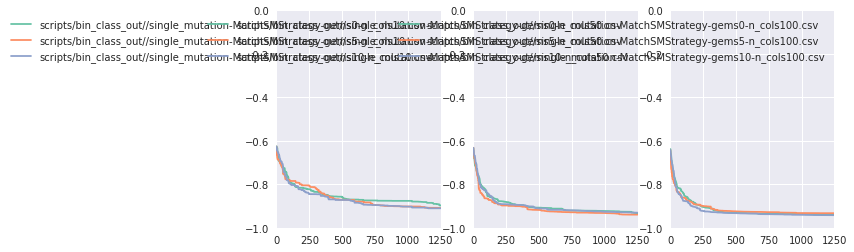

In [53]:
mutations = [(single_mutation, MatchSMStrategy)]
gems=[0, 5, 10]
n_cols=[10, 50, 100]

ax = plot_fitness(mutations, gems, n_cols)

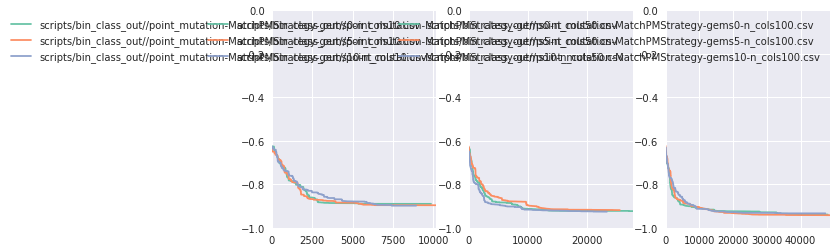

In [54]:
mutations = [(point_mutation, MatchPMStrategy)]
gems = [0, 5, 10]
n_cols = [10, 50, 100]

ax = plot_fitness(mutations, gems, n_cols)

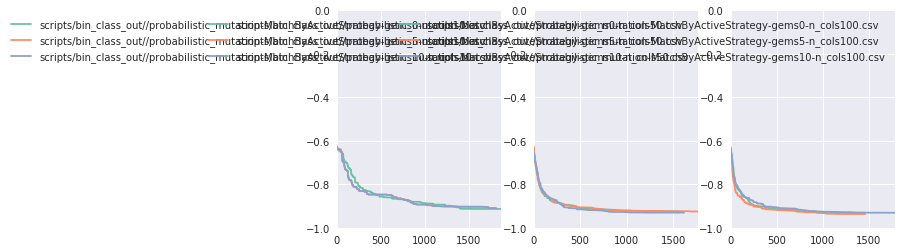

In [55]:
mutations = [(probabilistic_mutation, MatchByActiveStrategy)]
gems = [0, 5, 10]
n_cols = [10, 50, 100]

ax = plot_fitness(mutations, gems, n_cols)